In [1]:
import numpy as np
np.random.seed(1000)

In [2]:
import scipy.stats as scs
import statsmodels.api as sm

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def gen_paths(S0,r,sigma,T,M,I):
    dt=float(T)/M
    paths=np.zeros((M+1,I),np.float64)
    paths[0]=S0
    for t in range(1,M+1):
        rand=np.random.standard_normal(I)
        rand=(rand-rand.mean())/rand.std()
        paths[t]=paths[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*rand)
    return paths

In [5]:
S0=100.
r=0.05
sigma=0.2
T=1.0
M=50
I=250000
paths=gen_paths(S0,r,sigma,T,M,I)

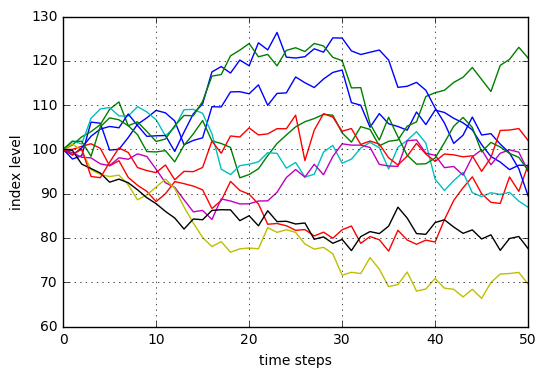

In [6]:
plt.plot(paths[:,:10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [7]:
log_returns=np.log(paths[1:]/paths[0:-1])

In [8]:
paths[:,0].round(4)

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [9]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [10]:
def print_statistics(array):
    sta=scs.describe(array)
    print "%14s %15s"%('statistic','value')
    print 30*'-'
    print "%14s %15.5f"%('size',sta[0])
    print "%14s %15.5f"%('min',sta[1][0])
    print "%14s %15.5f"%('max',sta[1][1])
    print "%14s %15.5f"%('mean',sta[2])
    print "%14s %15.5f"%('std',np.sqrt(sta[3]))
    print "%14s %15.5f"%('skew',sta[4])
    print "%14s %15.5f"%('kurtosis',sta[5])

In [11]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [12]:
scs.describe(log_returns.flatten())[2]*50

0.030000000000000058

In [13]:
np.sqrt(scs.describe(log_returns.flatten())[3]*50)

0.20000000800000062

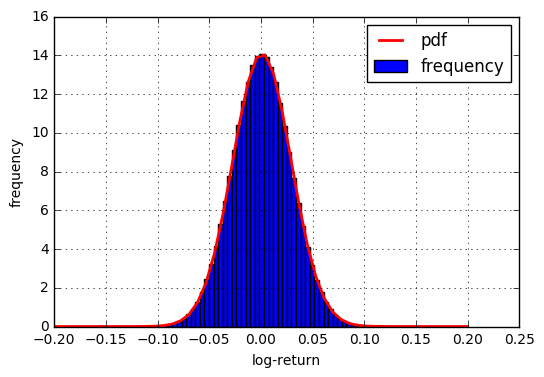

In [14]:
plt.hist(log_returns.flatten(),bins=70,normed=True,label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,loc=r/M,scale=sigma/np.sqrt(M)),'r',lw=2.0,label='pdf')
plt.legend()

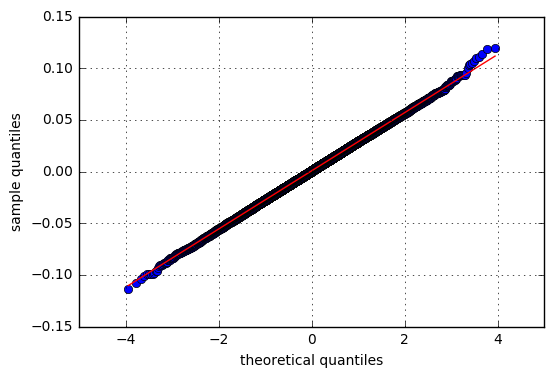

In [15]:
sm.qqplot(log_returns.flatten()[::500],line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [16]:
def normality_tests(arr):
    print "Skew of data set %14.3f"% scs.skew(arr)
    print "Skew test p-value %14.3f"% scs.skewtest(arr)[1]
    print "Kurt of data set %14.3f"% scs.kurtosis(arr)
    print "Kurt test p-value %14.3f"% scs.kurtosistest(arr)[1]
    print "Norm test p-value %14.3f"% scs.normaltest(arr)[1]

In [17]:
normality_tests(log_returns.flatten())

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


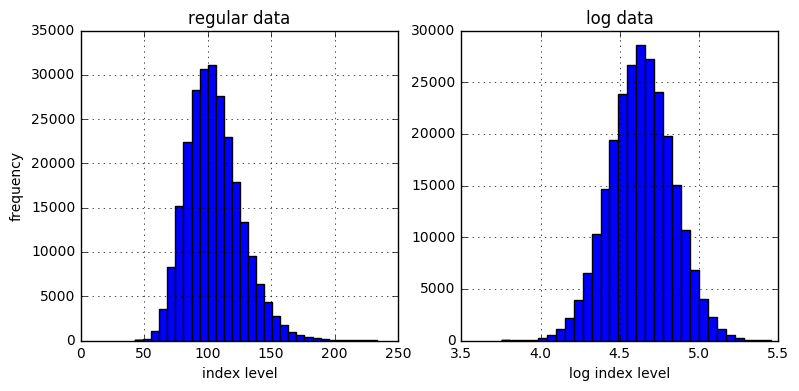

In [18]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(9,4))
ax1.hist(paths[-1],bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]),bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [19]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [20]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [21]:
normality_tests(np.log(paths[-1]))

Skew of data set         -0.001
Skew test p-value          0.851
Kurt of data set         -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


In [22]:
log_data=np.log(paths[-1])

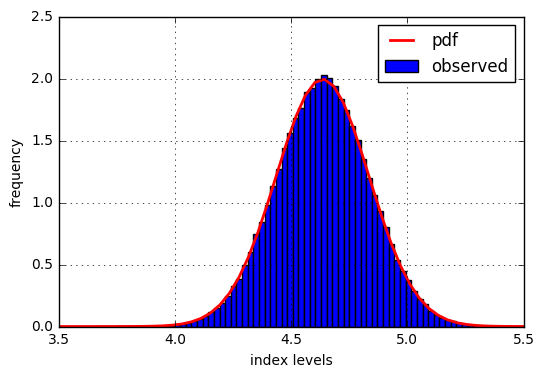

In [23]:
plt.hist(log_data,bins=70,normed=True,label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,log_data.mean(),log_data.std()),'r',lw=2.0,label='pdf')
plt.legend()

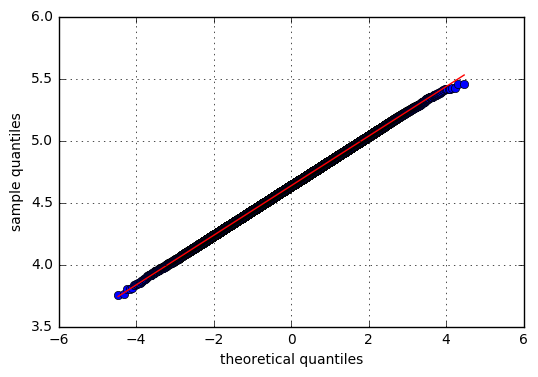

In [24]:
sm.qqplot(log_data,line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [25]:
import pandas as pd
import pandas_datareader.data as web

In [26]:
symbols=['^GDAXI','^GSPC','YHOO','MSFT']

In [27]:
data=pd.DataFrame()
for symbol in symbols:
    data[symbol]=web.DataReader(symbol,data_source='yahoo',start='1/1/2010')['Adj Close']
data=data.dropna()

In [28]:
data.head()

,^GDAXI,^GSPC,YHOO,MSFT
Date,,,,
2010-01-04,6048.299805,1132.989990,17.100000,25.710416
2010-01-05,6031.859863,1136.520020,17.230000,25.718722
2010-01-06,6034.330078,1137.140015,17.170000,25.560888
2010-01-07,6019.359863,1141.689941,16.700001,25.295062
2010-01-08,6037.609863,1144.979980,16.700001,25.469510


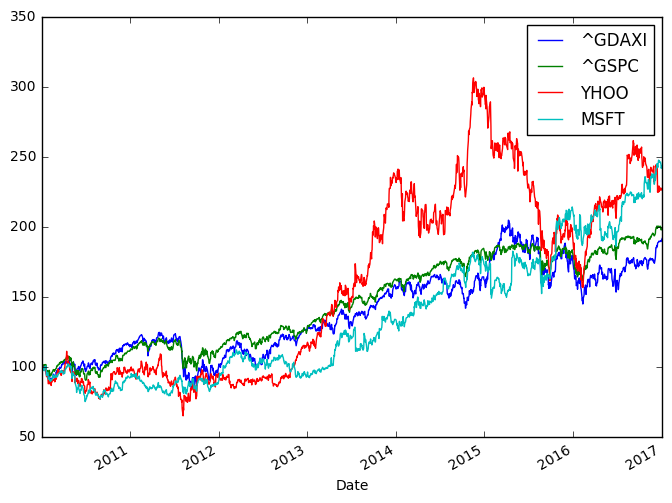

In [29]:
(data/data.ix[0]*100).plot(figsize=(8,6))

In [30]:
log_returns=np.log(data/data.shift(1))

In [31]:
log_returns.head()

,^GDAXI,^GSPC,YHOO,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.002722,0.003111,0.007574,0.000323
2010-01-06,0.000409,0.000545,-0.003488,-0.006156
2010-01-07,-0.002484,0.003993,-0.027755,-0.010454
2010-01-08,0.003027,0.002878,0.000000,0.006873


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f57c810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fa92bd0>]], dtype=object)

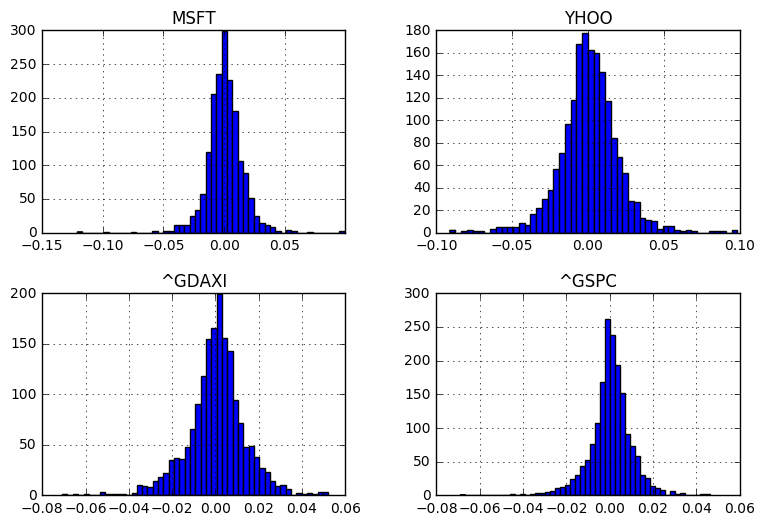

In [32]:
log_returns.hist(bins=50,figsize=(9,6))

In [33]:
for sym in symbols:
    print "\nResults for symbol %s"%sym
    print 30*'-'
    log_data=np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol ^GDAXI
------------------------------
     statistic           value
------------------------------
          size      1744.00000
           min        -0.07067
           max         0.05210
          mean         0.00037
           std         0.01319
          skew        -0.28944
      kurtosis         2.30893

Results for symbol ^GSPC
------------------------------
     statistic           value
------------------------------
          size      1744.00000
           min        -0.06896
           max         0.04632
          mean         0.00040
           std         0.00987
          skew        -0.45232
      kurtosis         4.14191

Results for symbol YHOO
------------------------------
     statistic           value
------------------------------
          size      1744.00000
           min        -0.09116
           max         0.09842
          mean         0.00047
           std         0.01927
          skew        -0.04562
      kurtosis         

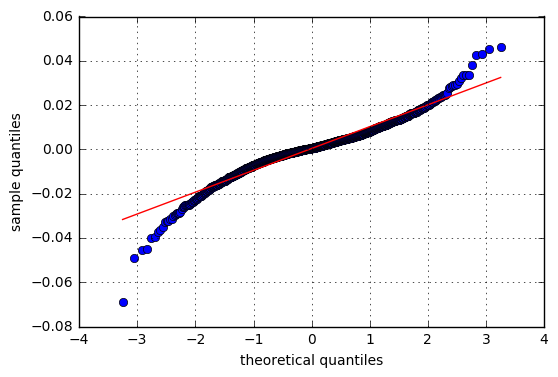

In [34]:
sm.qqplot(log_returns['^GSPC'].dropna(),line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

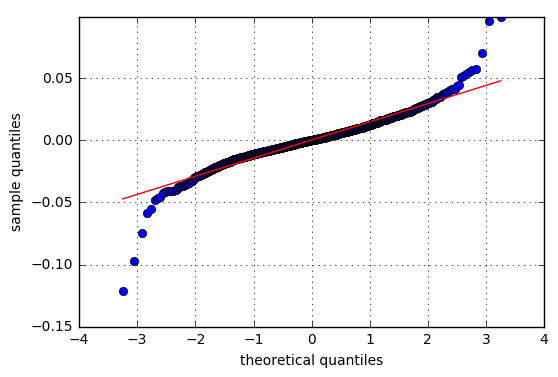

In [35]:
sm.qqplot(log_returns['MSFT'].dropna(),line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [36]:
for sym in symbols:
    print "\nResults for symbol %s"% sym
    print 32*'-'
    log_data=np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol ^GDAXI
--------------------------------
Skew of data set         -0.289
Skew test p-value          0.000
Kurt of data set          2.309
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol ^GSPC
--------------------------------
Skew of data set         -0.452
Skew test p-value          0.000
Kurt of data set          4.142
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol YHOO
--------------------------------
Skew of data set         -0.046
Skew test p-value          0.435
Kurt of data set          2.859
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set         -0.138
Skew test p-value          0.019
Kurt of data set          7.193
Kurt test p-value          0.000
Norm test p-value          0.000


In [37]:
symbols=['AAPL','MSFT','YHOO','DB','GLD']

In [38]:
noa=len(symbols)

In [39]:
data=pd.DataFrame()

In [40]:
for sym in symbols:
    data[sym]=web.DataReader(sym,data_source='yahoo',end='2014-09-12')['Adj Close']

In [41]:
data.head(5)

,AAPL,MSFT,YHOO,DB,GLD
Date,,,,,
2010-01-04,27.847252,25.710416,17.100000,61.392270,109.800003
2010-01-05,27.895396,25.718722,17.230000,62.565957,109.699997
2010-01-06,27.451683,25.560888,17.170000,61.484492,111.510002
2010-01-07,27.400936,25.295062,16.700001,62.180321,110.820000
2010-01-08,27.583106,25.469510,16.700001,64.427094,111.370003


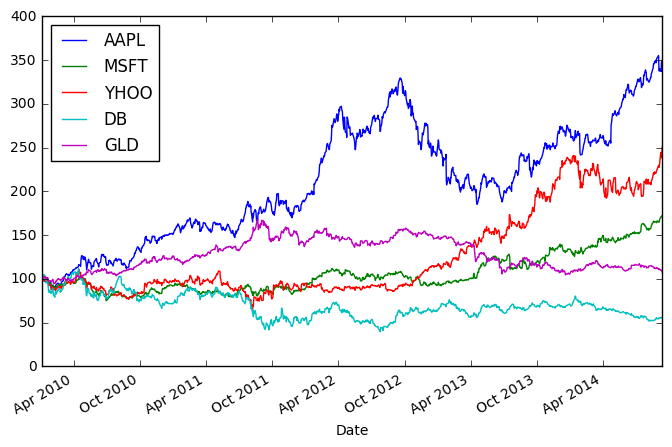

In [42]:
(data/data.ix[0]*100).plot(figsize=(8,5))

In [43]:
rets=np.log(data/data.shift(1))

In [44]:
rets.mean()*252

AAPL    0.267080
MSFT    0.114505
YHOO    0.196165
DB     -0.125174
GLD     0.016054
dtype: float64

In [45]:
rets.cov()*252

,AAPL,MSFT,YHOO,DB,GLD
AAPL,0.072784,0.020459,0.023243,0.041027,0.005231
MSFT,0.020459,0.049402,0.024244,0.046089,0.002105
YHOO,0.023243,0.024244,0.093349,0.051538,-0.000864
DB,0.041027,0.046089,0.051538,0.177517,0.008777
GLD,0.005231,0.002105,-0.000864,0.008777,0.032406


In [46]:
weights=np.random.random(noa)
weights/=np.sum(weights)

In [47]:
weights

array([ 0.0346395 ,  0.02726489,  0.2868883 ,  0.10396806,  0.54723926])

In [48]:
np.sum(rets.mean()*weights)*252

0.06442232477008025

In [49]:
np.dot(weights.T,np.dot(rets.cov()*252,weights))

0.02493024439754566

In [50]:
np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights)))

0.15789314233856283

In [51]:
prets=[]
pvols=[]
for p in range(2500):
    weights=np.random.random(noa)
    weights/=np.sum(weights)
    prets.append(np.sum(rets.mean()*weights)*252)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights))))
prets=np.array(prets)
pvols=np.array(pvols)

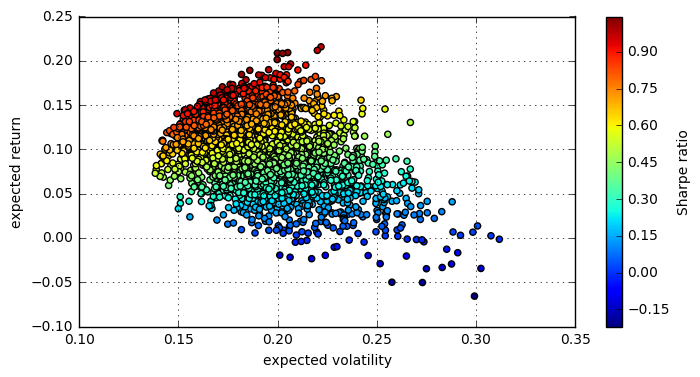

In [52]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [53]:
def statistics(weights):
    weights=np.array(weights)
    pret=np.sum(rets.mean()*weights)*252
    pvol=np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights)))
    return np.array([pret,pvol,pret/pvol])

In [54]:
import scipy.optimize as sco

In [55]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [56]:
cons=({'type':'eq','fun':lambda x:np.sum(x)-1})

In [57]:
bnds=tuple((0,1) for x in range(noa))

In [58]:
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [59]:
noa*[1./noa,]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [60]:
%%time
opts=sco.minimize(min_func_sharpe,noa*[1./noa,],method='SLSQP',bounds=bnds,constraints=cons)

CPU times: user 37.9 ms, sys: 2.09 ms, total: 40 ms
Wall time: 38.4 ms


In [61]:
opts

     fun: -1.0630084818820076
     jac: array([ -1.82986259e-04,  -7.02336431e-04,   7.18027353e-04,
         1.51409830e+00,   1.54866278e-03,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  6.61851697e-01,   8.64635660e-02,   2.51684737e-01,
         0.00000000e+00,   7.72494048e-19])

In [62]:
opts['x'].round(3)

array([ 0.662,  0.086,  0.252,  0.   ,  0.   ])

In [63]:
statistics(opts['x']).round(3)

array([ 0.236,  0.222,  1.063])

In [64]:
def min_func_variance(weights):
    return statistics(weights)[1]**2

In [65]:
optv=sco.minimize(min_func_variance,noa*[1./noa,],method='SLSQP',bounds=bnds,constraints=cons)

In [66]:
optv

     fun: 0.018288001228850173
     jac: array([ 0.03637058,  0.03644132,  0.03614311,  0.05221015,  0.03676901,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([  1.07601866e-01,   2.48940068e-01,   1.09310047e-01,
         8.18572640e-18,   5.34148019e-01])

In [67]:
optv['x'].round(3)

array([ 0.108,  0.249,  0.109,  0.   ,  0.534])

In [68]:
statistics(optv['x'].round(3))

array([ 0.08731149,  0.13523311,  0.64563696])

In [69]:
cons=({'type':'eq','fun':lambda x:statistics(x)[0]-tret},
      {'type':'eq','fun':lambda x:np.sum(x)-1})

In [70]:
bnds=tuple((0,1) for x in weights)

In [71]:
def min_func_port(weights):
    return statistics(weights)[1]

In [72]:
%%time
trets=np.linspace(0.0,0.25,50)
tvols=[]
for tret in trets:
    cons=({'type':'eq','fun':lambda x:statistics(x)[0]-tret},
          {'type':'eq','fun':lambda x:np.sum(x)-1})
    res=sco.minimize(min_func_port,noa*[1./noa,],method='SLSQP',bounds=bnds,constraints=cons)
    tvols.append(res['fun'])
tvols=np.array(tvols)

CPU times: user 3.99 s, sys: 32.2 ms, total: 4.02 s
Wall time: 4.1 s


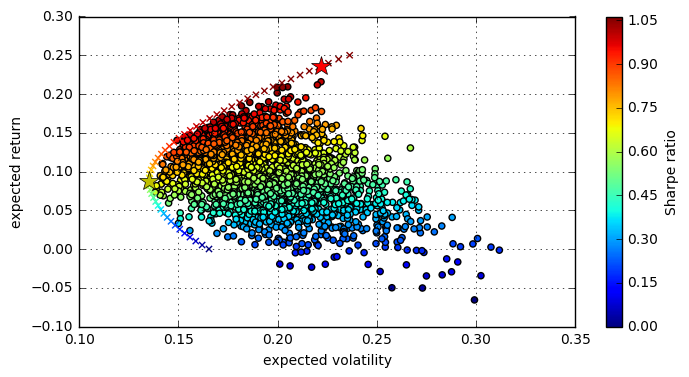

In [73]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,c=trets/tvols,marker='x')
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*',markersize=15.0)
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*',markersize=15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [74]:
import scipy.interpolate as sci

In [75]:
ind=np.argmin(tvols)

In [76]:
evols=tvols[ind:]

In [77]:
erets=trets[ind:]

In [78]:
tck=sci.splrep(evols,erets)

In [79]:
def f(x):
    return sci.splev(x,tck,der=0)
def df(x):
    return sci.splev(x,tck,der=1)

In [80]:
def equations(p,rf=0.01):
    eq1=rf-p[0]
    eq2=rf+p[1]*p[2]-f(p[2])
    eq3=p[1]-df(p[2])
    return eq1,eq2,eq3

In [81]:
opt=sco.fsolve(equations,[0.01,0.5,0.15])

In [82]:
opt

array([ 0.01      ,  1.0183289 ,  0.22606875])

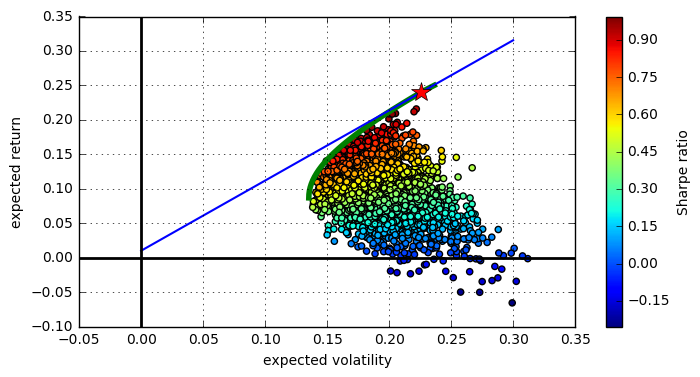

In [83]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets,c=(prets-0.01)/pvols,marker='o')
plt.plot(evols,erets,'g',lw=4.0)
cx=np.linspace(0.0,0.3)
plt.plot(cx,opt[0]+opt[1]*cx,lw=1.5)
plt.plot(opt[2],f(opt[2]),'r*',markersize=15.0)
plt.grid(True)
plt.axhline(0,color='k',ls='-',lw=2.0)
plt.axvline(0,color='k',ls='-',lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [84]:
cons=({'type':'eq','fun':lambda x:statistics(x)[0]-f(opt[2])},
      {'type':'eq','fun':lambda x:np.sum(x)-1})
res=sco.minimize(min_func_port,noa*[1./ noa,],method='SLSQP',bounds=bnds,constraints=cons)

In [85]:
res['x'].round(3)

array([ 0.687,  0.057,  0.256,  0.   ,  0.   ])

In [86]:
from sklearn.decomposition import KernelPCA

In [87]:
symbols = ['ADS.DE','ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
            'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
                         'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
                         'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
                         'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
                         'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
                         '^GDAXI']

In [88]:
%%time
data=pd.DataFrame()
for sym in symbols:
    data[sym]=web.DataReader(sym,data_source='yahoo')['Close']
data=data.dropna()

CPU times: user 419 ms, sys: 55.8 ms, total: 475 ms
Wall time: 11.1 s


In [89]:
dax=pd.DataFrame(data.pop('^GDAXI'))

In [90]:
data.head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,38.505,88.54,44.850,56.40,46.445,32.050,4.8427,36.8678,37.550,58.64,...,85.00,27.760,65.21,108.30,68.7311,32.940,41.740,63.4424,27.395,64.50
2010-01-05,39.720,88.81,44.170,55.37,46.200,32.310,5.0070,39.1742,37.240,58.52,...,83.02,28.495,64.73,108.50,68.2926,32.645,44.525,63.4811,27.765,63.25
2010-01-06,39.400,89.50,44.450,55.02,46.165,32.810,5.1745,39.4304,37.250,57.80,...,84.44,28.350,64.69,107.80,68.1630,33.225,45.020,63.7137,27.630,65.00
2010-01-07,39.745,88.47,44.155,54.30,45.700,33.100,5.3876,44.4831,36.720,56.78,...,83.92,28.935,66.05,108.05,67.8740,34.105,46.200,64.4696,27.550,65.75
2010-01-08,39.600,87.99,44.020,53.82,44.380,32.655,5.4573,45.3051,36.935,55.85,...,83.10,28.505,65.38,107.85,67.7743,34.345,46.040,64.8765,28.070,66.46


In [91]:
scale_function=lambda x:(x-x.mean())/x.std()

In [92]:
pca=KernelPCA().fit(data.apply(scale_function))

In [93]:
len(pca.lambdas_)

908

In [94]:
pca.lambdas_[:10].round()

array([ 33732.,   5999.,   5381.,   2723.,   2020.,    856.,    745.,
          533.,    307.,    223.])

In [95]:
(pca.lambdas_/pca.lambdas_.sum())[:10]

array([ 0.63096784,  0.11220905,  0.10065046,  0.0509408 ,  0.03778356,
        0.01601823,  0.01392982,  0.00996174,  0.00574182,  0.00417346])

In [96]:
(pca.lambdas_/pca.lambdas_.sum())[:10].sum()

0.98237678576948217

In [97]:
pca=KernelPCA(n_components=1).fit(data.apply(scale_function))

In [98]:
dax['PCA_1']=pca.transform(-data)

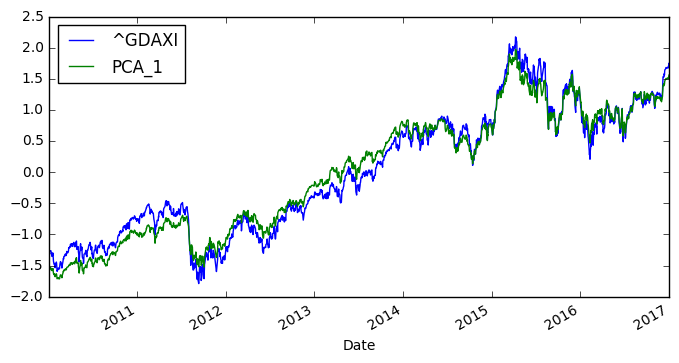

In [99]:
dax.apply(scale_function).plot(figsize=(8,4))

In [100]:
pca=KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components=pca.transform(-data)
weights=pca.lambdas_/pca.lambdas_.sum()
dax['PCA_5']=np.dot(pca_components,weights)

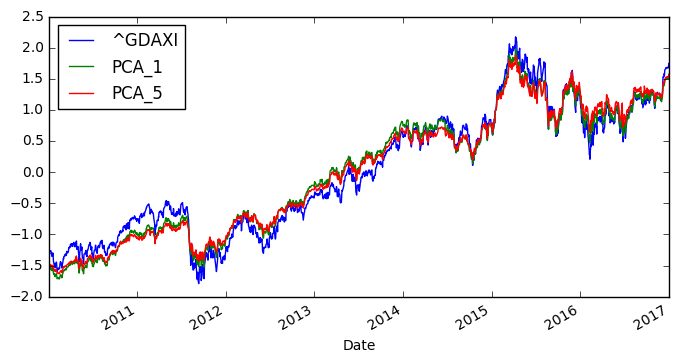

In [101]:
dax.apply(scale_function).plot(figsize=(8,4))

In [102]:
mpl_dates=mpl.dates.date2num(data.index.to_pydatetime())

In [103]:
mpl_dates

array([ 733776.,  733777.,  733778., ...,  736328.,  736331.,  736332.])

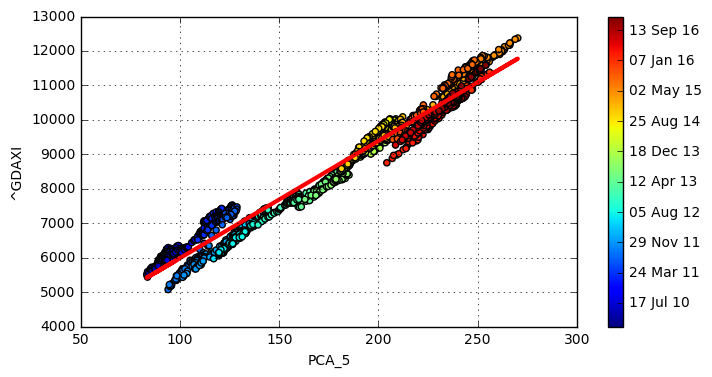

In [104]:
plt.figure(figsize=(8,4))
plt.scatter(dax['PCA_5'],dax['^GDAXI'],c=mpl_dates)
lin_reg=np.polyval(np.polyfit(dax['PCA_5'],dax['^GDAXI'],1),dax['PCA_5'])
plt.plot(dax['PCA_5'],lin_reg,'r',lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),format=mpl.dates.DateFormatter('%d %b %y'))

In [105]:
cut_date='2011/7/1'
early_pca=dax[dax.index<cut_date]['PCA_5']
early_reg=np.polyval(np.polyfit(early_pca,dax[dax.index<cut_date]['^GDAXI'],1),early_pca)

In [106]:
late_pca=dax[dax.index>=cut_date]['PCA_5']
late_reg=np.polyval(np.polyfit(late_pca,dax['^GDAXI'][dax.index>=cut_date],1),late_pca)

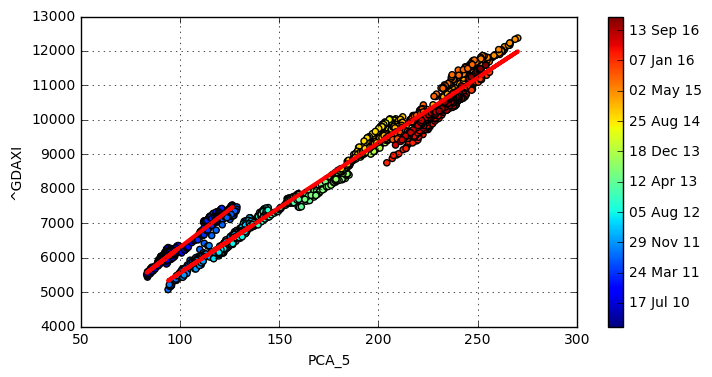

In [107]:
plt.figure(figsize=(8,4))
plt.scatter(dax['PCA_5'],dax['^GDAXI'],c=mpl_dates)
plt.plot(early_pca,early_reg,'r',lw=3)
plt.plot(late_pca,late_reg,'r',lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),format=mpl.dates.DateFormatter('%d %b %y'))

In [108]:
import warnings
warnings.simplefilter('ignore')
import pymc3 as pm

In [109]:
np.random.seed(1000)

In [110]:
x=np.linspace(0,10,500)
y=4+2*x+np.random.standard_normal(len(x))*2

In [111]:
reg=np.polyfit(x,y,1)

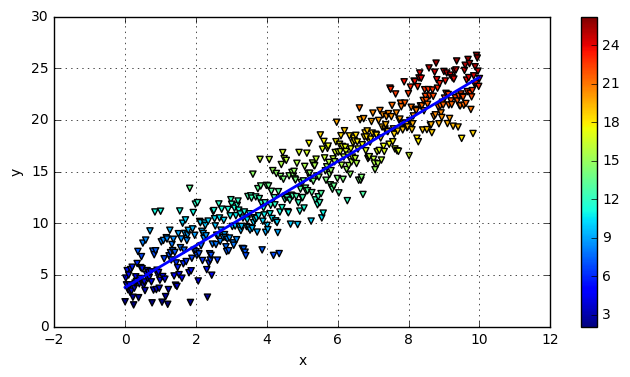

In [112]:
plt.figure(figsize=(8,4))
plt.scatter(x,y,c=y,marker='v')
plt.plot(x,reg[1]+reg[0]*x,lw=2.0)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [113]:
reg

array([ 2.03384161,  3.77649234])

In [114]:
with pm.Model() as model:
    alpha=pm.Normal('alpha',mu=0,sd=20)
    beta=pm.Normal('beta',mu=0,sd=20)
    sigma=pm.Uniform('sigma',lower=0,upper=10)
    y_est=alpha+beta*x
    likelihood=pm.Normal('y',mu=y_est,sd=sigma,observed=y)
    start=pm.find_MAP()
    step=pm.NUTS(state=start)
    trace=pm.sample(100,step,start=start,progressbar=False)

Optimization terminated successfully.
         Current function value: 1065.968801
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21


In [115]:
trace[0]

{'alpha': 3.9240065171325469,
 'beta': 2.0242759725163029,
 'sigma': 2.0071601413413473,
 'sigma_interval_': -1.3818252652128999}

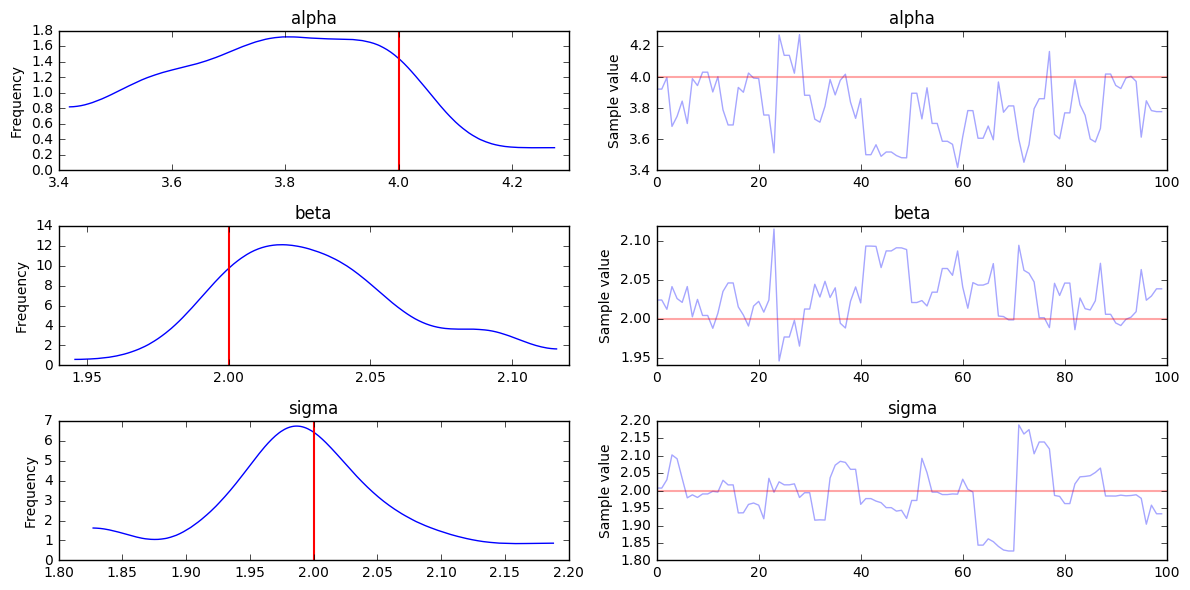

In [116]:
fig=pm.traceplot(trace,lines={'alpha':4,'beta':2,'sigma':2})
plt.figure(figsize=(8,8))

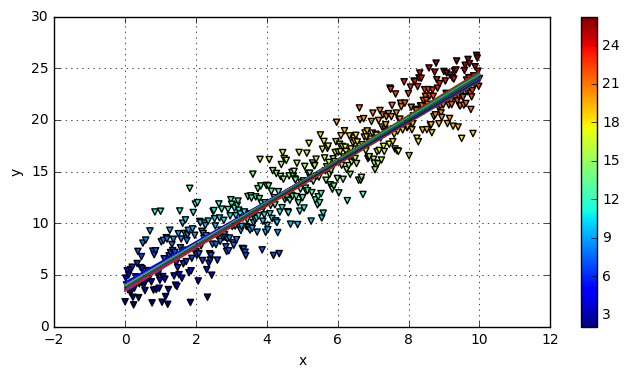

In [117]:
plt.figure(figsize=(8,4))
plt.scatter(x,y,c=y,marker='v')
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x,trace['alpha'][i]+trace['beta'][i]*x)

In [118]:
import zipline
import pytz
import datetime as dt

In [119]:
data=zipline.data.load_from_yahoo(stocks=['GLD','GDX'],end=dt.datetime(2014,3,15,0,0,0,0,pytz.utc)).dropna()

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1967 entries, 2006-05-22 to 2014-03-14
Data columns (total 2 columns):
GDX    1967 non-null float64
GLD    1967 non-null float64
dtypes: float64(2)
memory usage: 46.1 KB


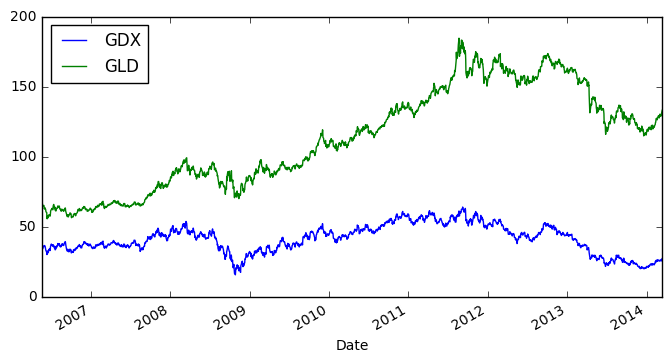

In [121]:
data.plot(figsize=(8,4))

In [122]:
data.ix[-1]/data.ix[0]-1

GDX   -0.215999
GLD    1.038285
dtype: float64

In [123]:
data.corr()

,GDX,GLD
GDX,1.00000,0.46696
GLD,0.46696,1.00000


In [124]:
data.index

DatetimeIndex(['2006-05-22', '2006-05-23', '2006-05-24', '2006-05-25',
               '2006-05-26', '2006-05-30', '2006-05-31', '2006-06-01',
               '2006-06-02', '2006-06-05',
               ...
               '2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06',
               '2014-03-07', '2014-03-10', '2014-03-11', '2014-03-12',
               '2014-03-13', '2014-03-14'],
              dtype='datetime64[ns, UTC]', name=u'Date', length=1967, freq=None)

In [125]:
mpl_dates=mpl.dates.date2num(data.index.to_pydatetime())

In [126]:
mpl_dates

array([ 732453.,  732454.,  732455., ...,  735304.,  735305.,  735306.])

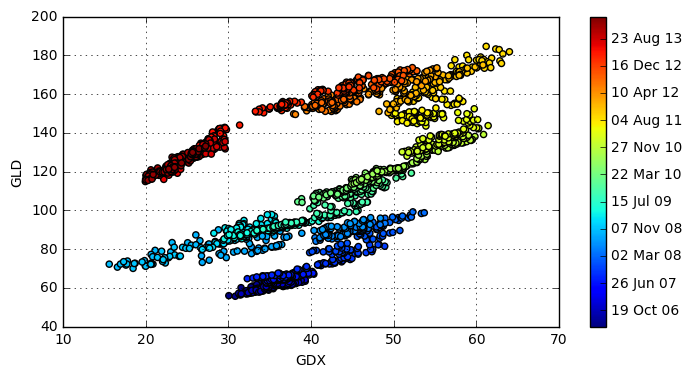

In [127]:
plt.figure(figsize=(8,4))
plt.scatter(data['GDX'],data['GLD'],c=mpl_dates,marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),format=mpl.dates.DateFormatter('%d %b %y'))

In [128]:
with pm.Model() as model:
    alpha=pm.Normal('alpha',mu=0,sd=20)
    beta=pm.Normal('beta',mu=0,sd=20)
    sigma=pm.Uniform('sigma',lower=0,upper=50)
    
    y_est=alpha+beta*data['GDX'].values
    likelihood=pm.Normal('GLD',mu=y_est,sd=sigma,observed=data['GLD'].values)
    start=pm.find_MAP()
    step=pm.NUTS(state=start)
    trace=pm.sample(100,step,start=start,progressbar=False)

Optimization terminated successfully.
         Current function value: 9588.819393
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21


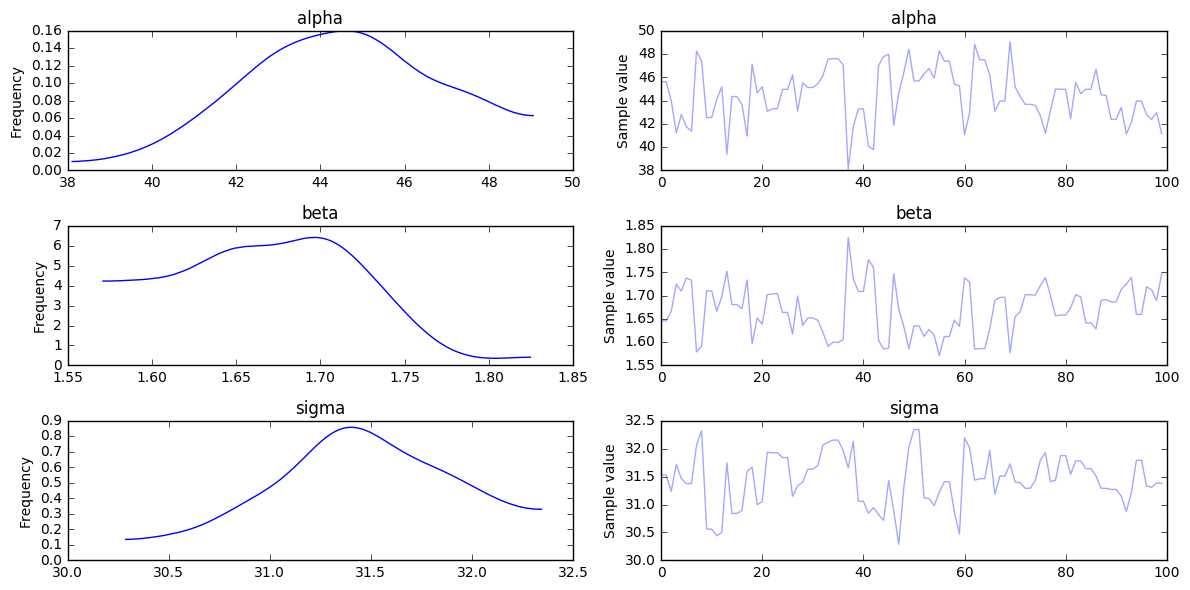

In [129]:
fig=pm.traceplot(trace)
plt.figure(figsize=(8,8))

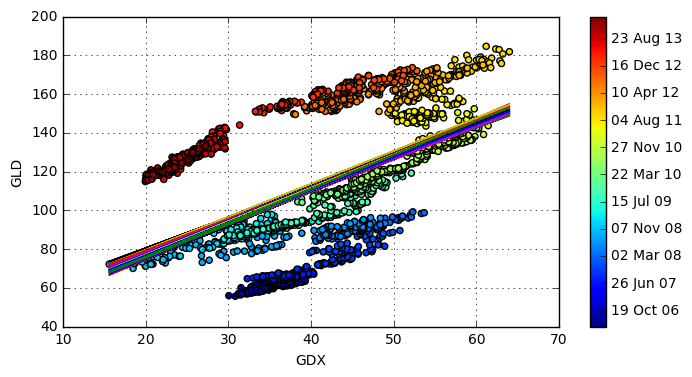

In [130]:
plt.figure(figsize=(8,4))
plt.scatter(data['GDX'],data['GLD'],c=mpl_dates,marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
for i in range(len(trace)):
    plt.plot(data['GDX'],trace['alpha'][i]+trace['beta'][i]*data['GDX'])
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),format=mpl.dates.DateFormatter('%d %b %y'))

In [131]:
model_randomwalk=pm.Model()

In [132]:
with model_randomwalk:
    sigma_alpha=pm.Exponential('sigma_alpha',1./.02,testval=.1)
    sigma_beta=pm.Exponential('sigma_beta',1./.02,testval=.1)

In [133]:
from pymc3.distributions.timeseries import GaussianRandomWalk

In [134]:
subsample_alpha=50
subsample_beta=50

In [135]:
with model_randomwalk:
    alpha=GaussianRandomWalk('alpha',sigma_alpha**-2,shape=len(data)/subsample_alpha)
    beta=GaussianRandomWalk('beta',sigma_beta**-2,shape=len(data)/subsample_beta)
    alpha_r=np.repeat(alpha,subsample_alpha)
    beta_r=np.repeat(beta,subsample_beta)